To better view the data, the settings for max display of row and cloumns are changed to infinite.


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
import kagglehub
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
print(path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 6.35MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [ ]:
car= pd.read_csv(path + "/CarPrice_Assignment.csv")

After uploading the data, the first step is to check its structure (e.g., number of rows, missing values, etc.) and ensure that Colab correctly identifies its data types.

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


car_ID is simply a numeric counter for the cars; it is not useful for the analysis and can be dropped.

In [ ]:
car=car.drop('car_ID',axis=1)

In [ ]:
car.shape

(205, 25)

In [ ]:
car.dtypes

,0
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64


In [ ]:
for i in (0,1,2,3,4,5,6,7,13,14,16):
 car[car.columns[i]] = car[car.columns[i]].astype('category')

In [ ]:
car.dtypes

,0
symboling,category
CarName,category
fueltype,category
aspiration,category
doornumber,category
carbody,category
drivewheel,category
enginelocation,category
wheelbase,float64
carlength,float64


In [ ]:
car.isnull().sum()

,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


Study of the target variable

In [ ]:
round(car['price'].describe(),2)

,price
count,205.00
mean,13276.71
std,7988.85
min,5118.00
25%,7788.00
50%,10295.00
75%,16503.00
max,45400.00


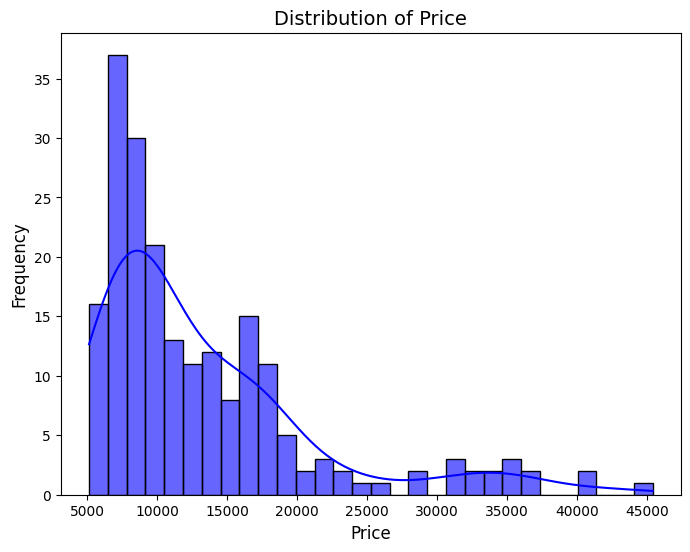

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(car["price"], kde=True, bins=30, color="blue", alpha=0.6)

plt.title("Distribution of Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

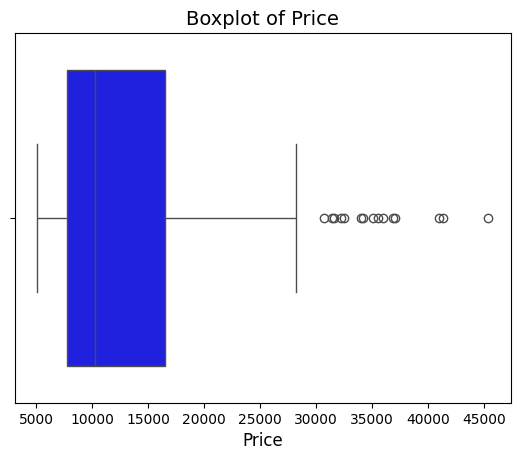

In [ ]:
sns.boxplot(x=car['price'],color="b")

plt.title("Boxplot of Price", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.show()

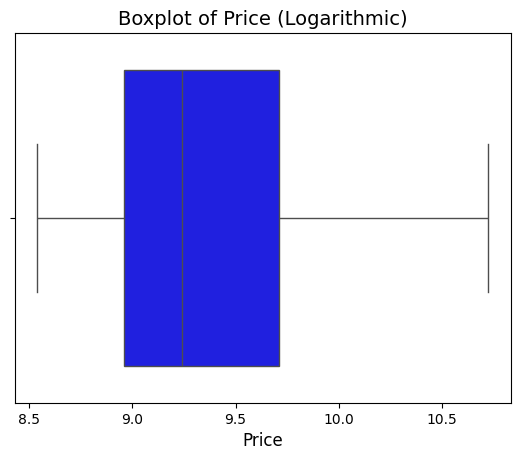

In [ ]:
import numpy as np

sns.boxplot(x=np.log(car['price']),color="b")

plt.title("Boxplot of Price (Logarithmic)", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.show()

Categorical Variable Study

<ipython-input-15-19d9f793aaff>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (car.groupby(column)["price"].mean()).plot(kind="bar", color="blue", alpha=0.8, ax=ax)
<ipython-input-15-19d9f793aaff>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (car.groupby(column)["price"].mean()).plot(kind="bar", color="blue", alpha=0.8, ax=ax)
<ipython-input-15-19d9f793aaff>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (car

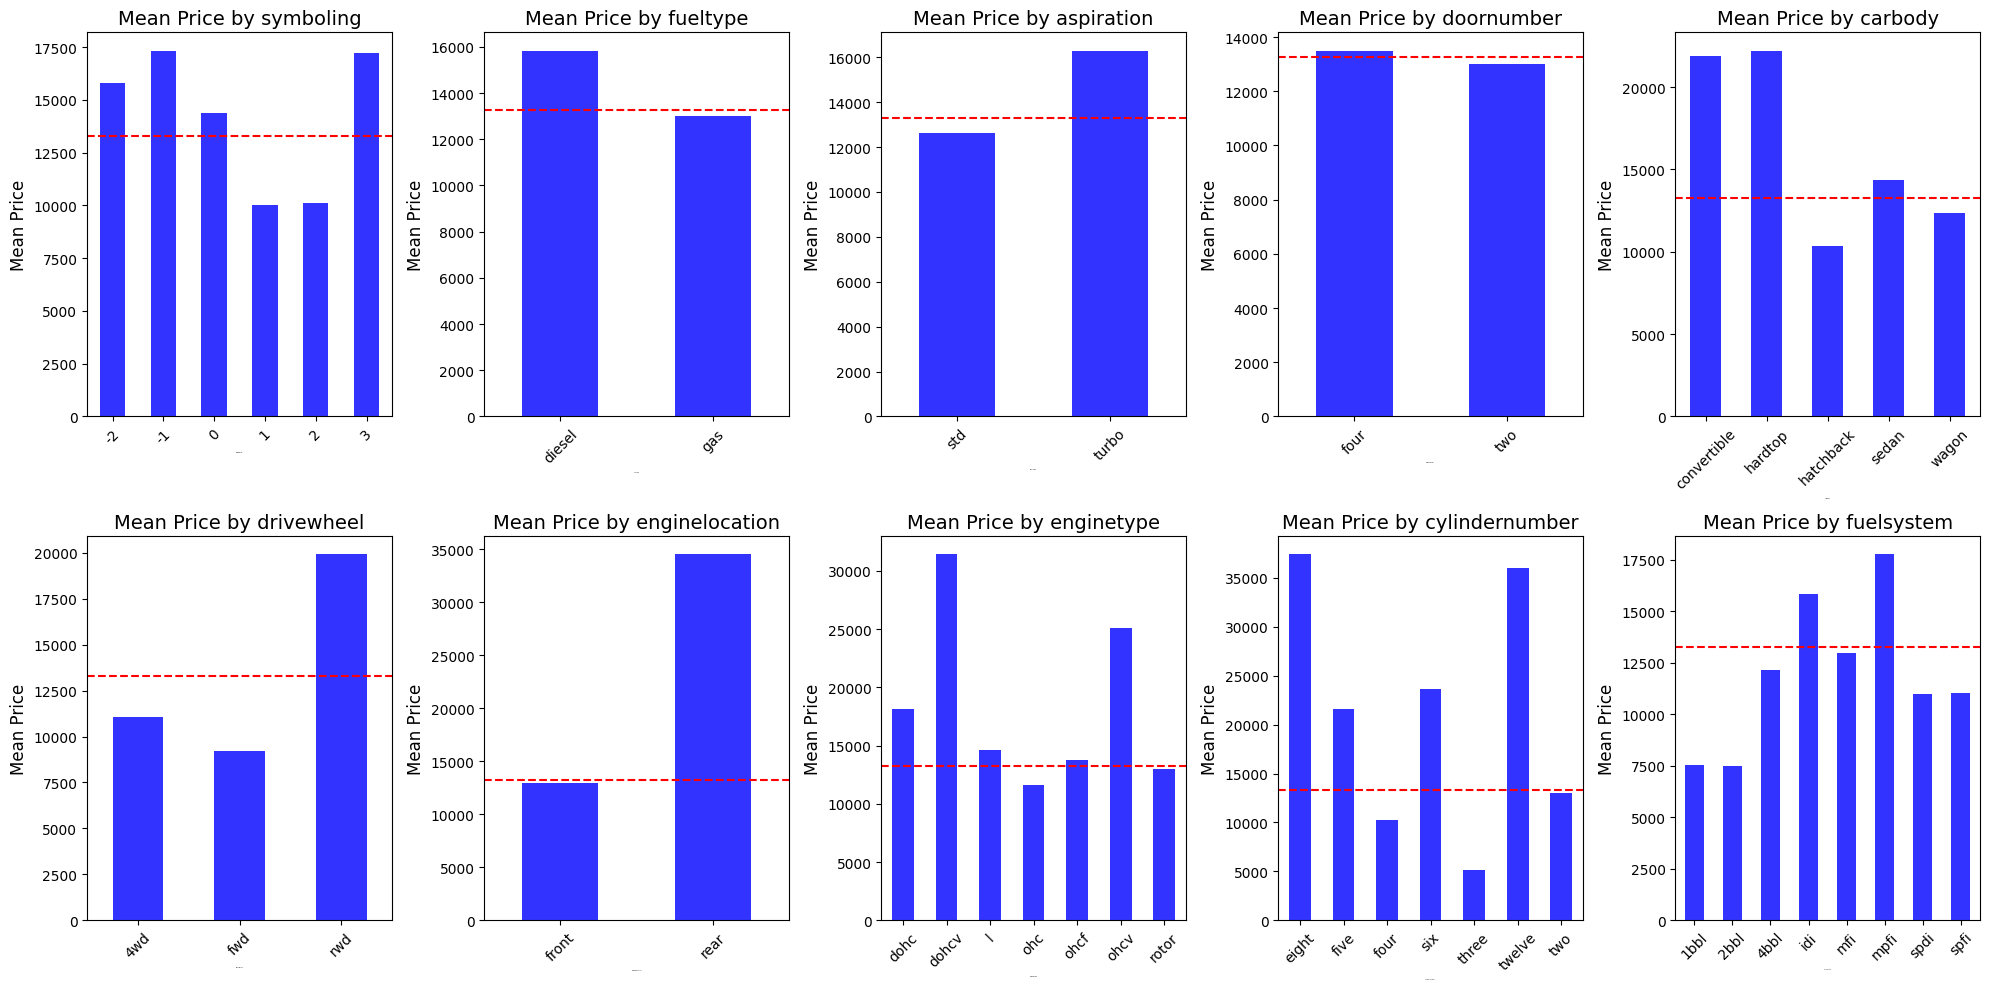

In [ ]:
import matplotlib.pyplot as plt

carcat=car.select_dtypes(include=['category'])
carcat=carcat.drop('CarName',axis=1)
columns_to_plot = carcat.columns

fig, axes = plt.subplots(2,5,figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    (car.groupby(column)["price"].mean()).plot(kind="bar", color="blue", alpha=0.8, ax=ax)
    ax.axhline(car["price"].mean(), color="red", linestyle="--")

    ax.set_title(f"Mean Price by {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=1)
    ax.set_ylabel("Mean Price", fontsize=12)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig('mean_price_by_category.png', dpi=300)
plt.show()


doornumber should'nt be informative of the target, because it's the only variable that has the mean of price for each category very similar to the genral mean.

In [ ]:
carcat=carcat.drop('doornumber',axis=1)

Numerical Variable Study

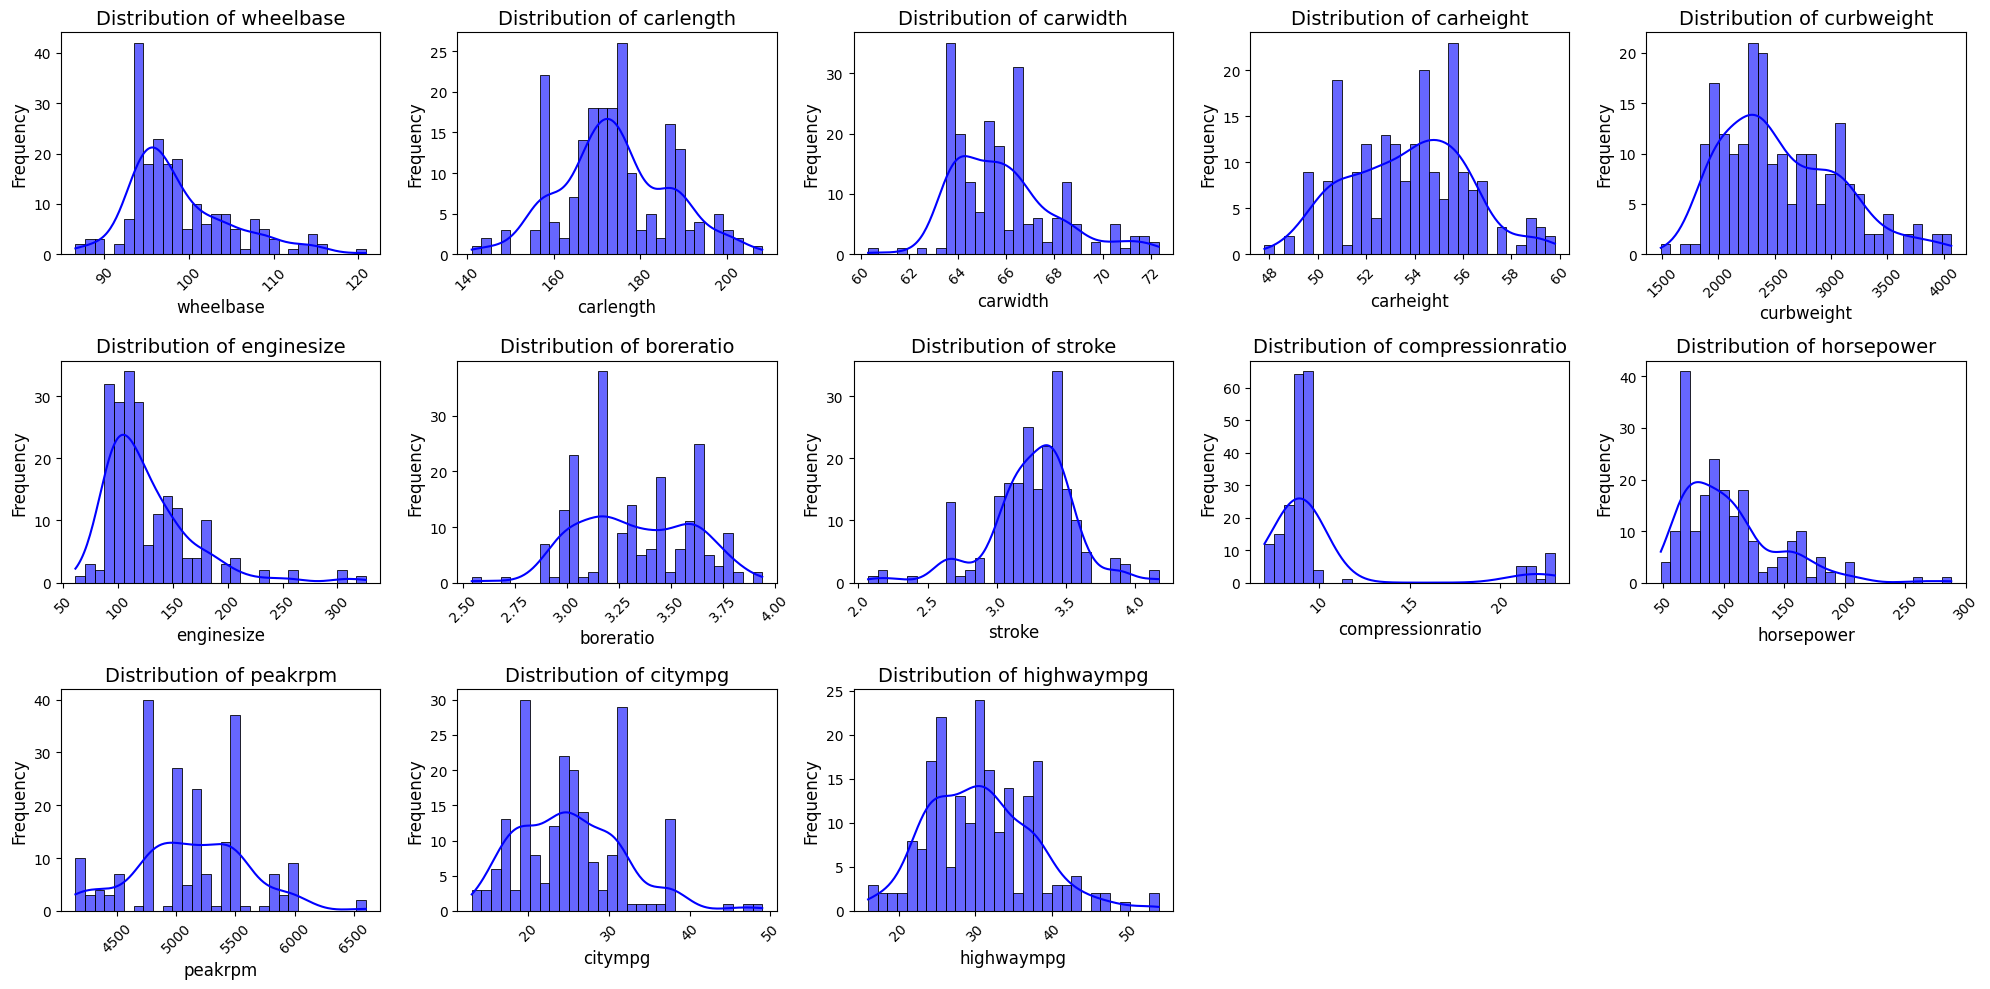

In [ ]:
carnum = car.select_dtypes(include=['number'])
carnum=carnum.drop('price',axis=1)
columns_to_plot = carnum.columns

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.histplot(car[column], kde=True, bins=30, color="blue", alpha=0.6, ax=ax)

    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(axis="x", rotation=45)


for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('distribution_of_numeric_variables.png', dpi=300)
plt.show()


Logarithmic transformation, for right-skewed and with many outliers variables.

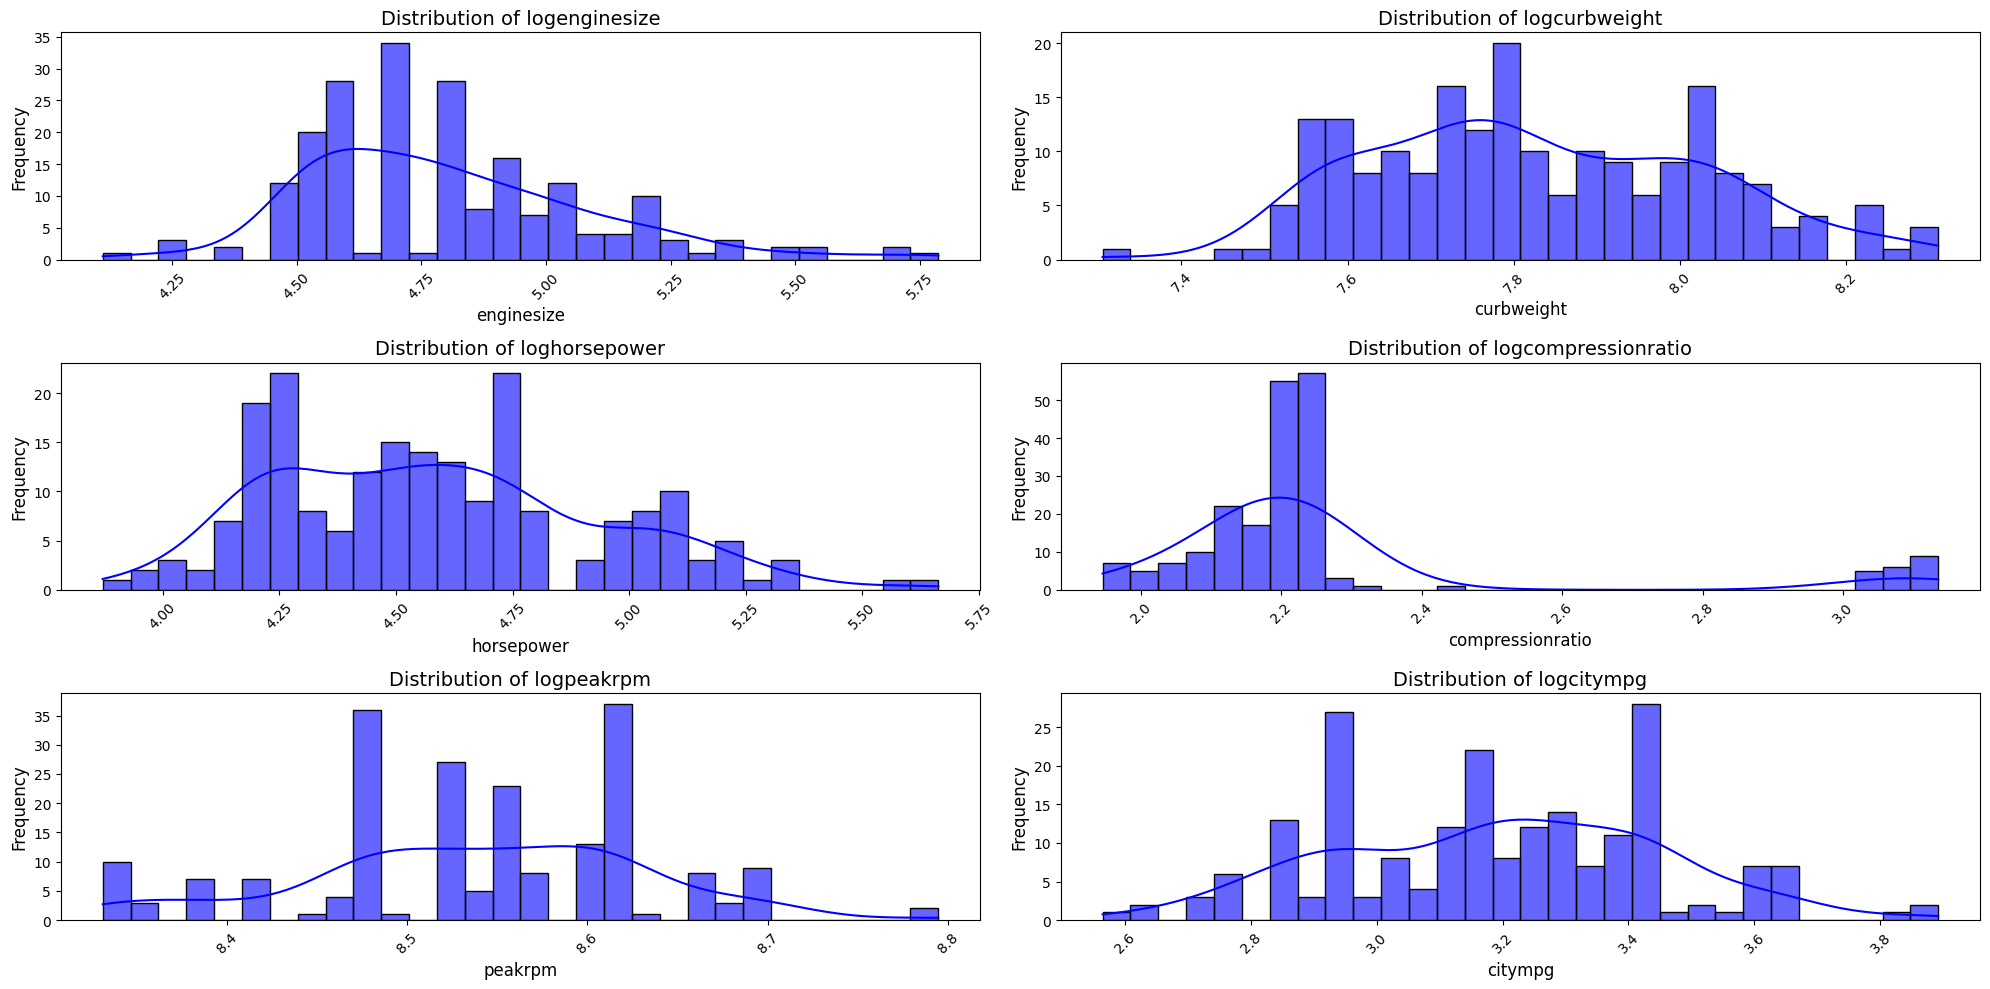

In [ ]:
import numpy as np
columns_to_plot = ["enginesize","curbweight","horsepower","compressionratio","peakrpm","citympg"]

fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.histplot(np.log(car[column]), kde=True, bins=30, color="blue", alpha=0.6, ax=ax)

    ax.set_title(f"Distribution of log{column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig('distribution_of_numeric_variables1.png', dpi=300)
plt.show()

In [ ]:
carnum["logprice"]=np.log(car["price"])
carnum["logpeakrpm"]=np.log(carnum["peakrpm"])
carnum["logcitympg"]=np.log(carnum["citympg"])
carnum["logenginesize"]=np.log(carnum["enginesize"])
carnum["logcurbweight"]=np.log(carnum["curbweight"])
carnum["loghorsepower"]=np.log(carnum["horsepower"])
carnum["logcompressionratio"]=np.log(carnum["compressionratio"])
carnum=carnum.drop(["enginesize","curbweight","horsepower","compressionratio","peakrpm","citympg"],axis=1)

Study of the independent variables distribution.

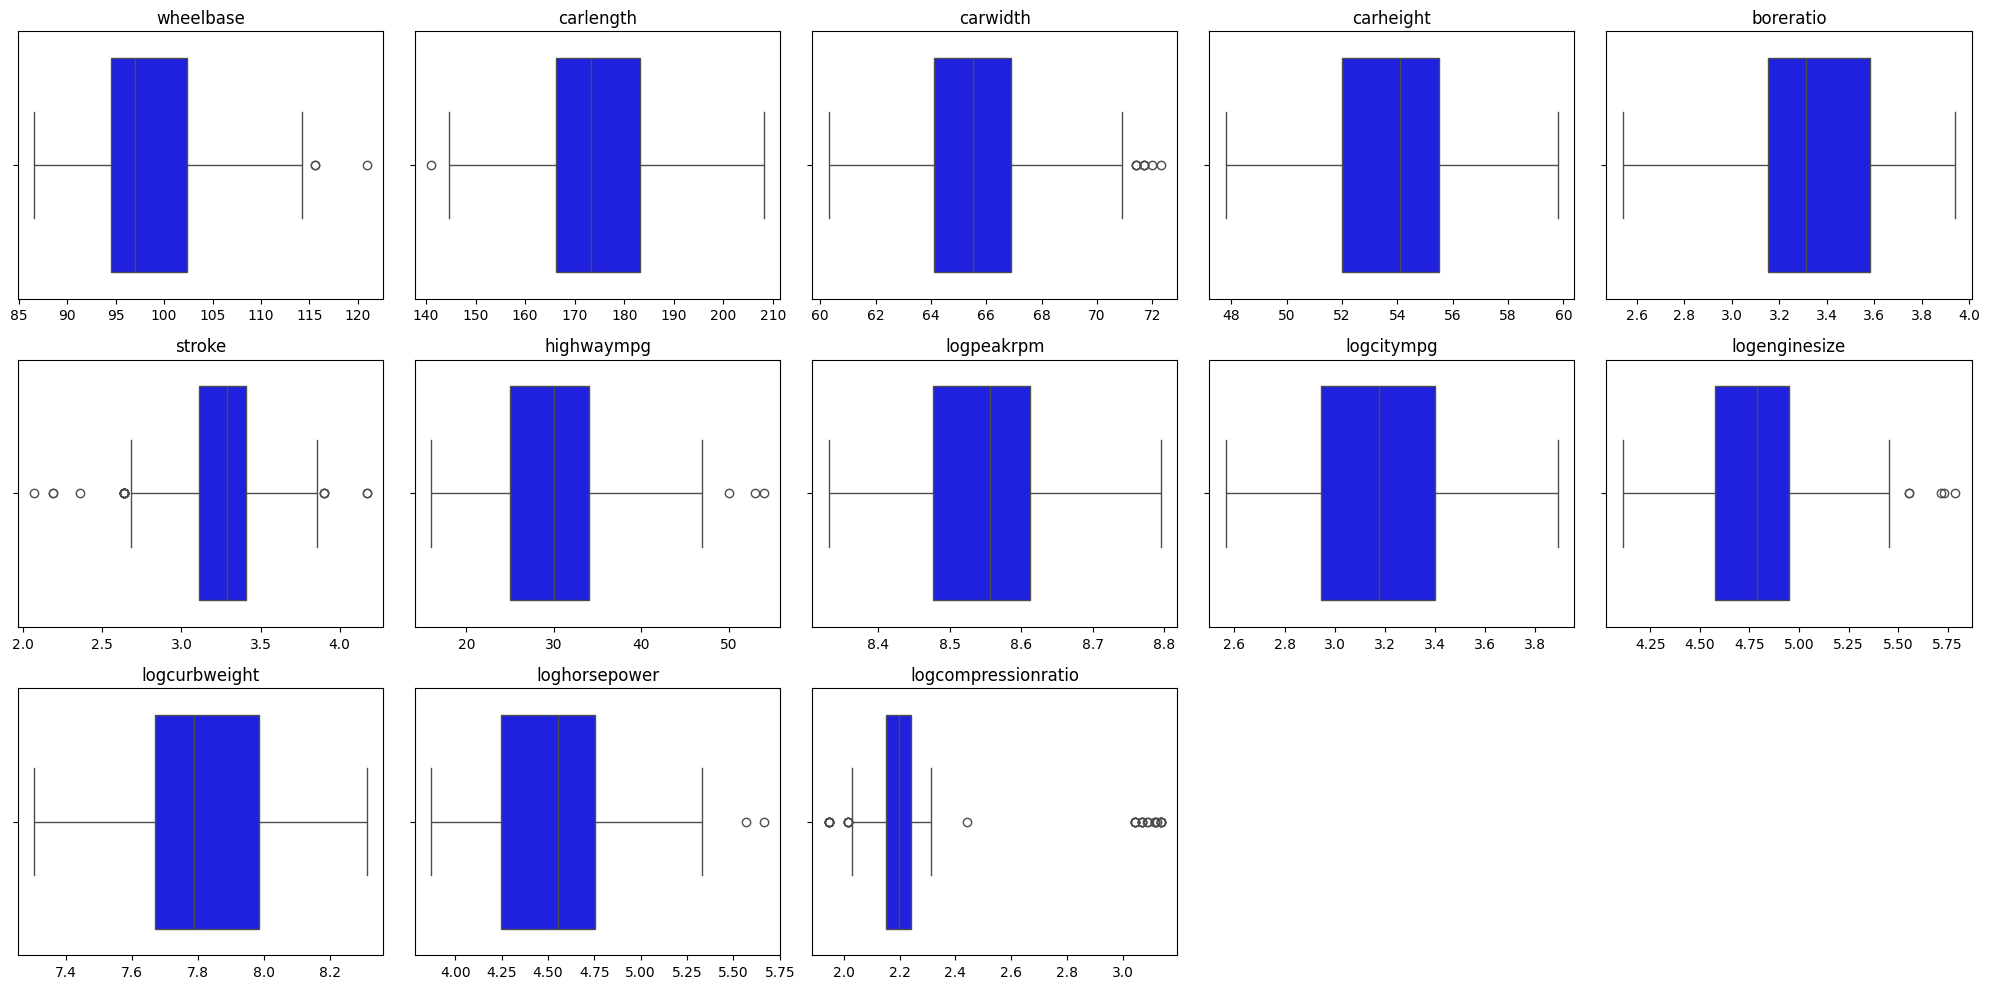

In [ ]:
col1 = [col for col in carnum.columns if col != "logprice"]

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(col1, axes)):
    sns.boxplot(data=carnum[col], orient="h", ax=ax, color="blue")
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')

if len(col1) < len(axes):
    for j in range(len(col1), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('distribution_of_numeric_variables11.png', dpi=300)
plt.show()

Outliers Detection

In [ ]:
outliers = pd.DataFrame(index=carnum.index)

for col in carnum.columns:
    Q1 = carnum[col].quantile(0.25)
    Q3 = carnum[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col + '_outlier'] = carnum[col].apply(
        lambda x: '-' if x < lower_bound else ('*' if x > upper_bound else '')
    )

outliers_with_outliers = outliers[outliers.apply(lambda row: row.str.contains('*', regex=False).any() or row.str.contains('-', regex=False).any(), axis=1)]

print(outliers_with_outliers.to_string(index=True, header=True))

    wheelbase_outlier carlength_outlier carwidth_outlier carheight_outlier boreratio_outlier stroke_outlier highwaympg_outlier logprice_outlier logpeakrpm_outlier logcitympg_outlier logenginesize_outlier logcurbweight_outlier loghorsepower_outlier logcompressionratio_outlier
6                                                      *                                                                                                                                                                                                                           
7                                                      *                                                                                                                                                                                                                           
8                                                      *                                                                                                                    

In [ ]:
outliers_count = outliers.apply(lambda row: row.str.contains('*', regex=False).sum() + row.str.contains('-', regex=False).sum(), axis=1)
(outliers_count == 1).sum()

50

In [ ]:
outliers_rows = car.loc[outliers[outliers.apply(lambda row: row.str.contains('*', regex=False).any() or row.str.contains('-', regex=False).any(), axis=1)].index]
outliers_rows = car.loc[outliers_count == 1]
print(outliers_rows.to_string(index=True, header=True))

    symboling                    CarName fueltype aspiration doornumber    carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg      price
6           1                 audi 100ls      gas        std       four      sedan        fwd          front      105.8      192.7      71.4       55.7        2844        ohc           five         136       mpfi       3.19    3.40               8.5         110     5500       19          25  17710.000
7           1                  audi 5000      gas        std       four      wagon        fwd          front      105.8      192.7      71.4       55.7        2954        ohc           five         136       mpfi       3.19    3.40               8.5         110     5500       19          25  18920.000
8           1                  audi 4000      gas      turbo       four      sedan        f

Many outliers correspond to the same car models. So we assume they are special characteristics rather than outliers.

Realation Between Numerical Variables and Target, with variable selection.

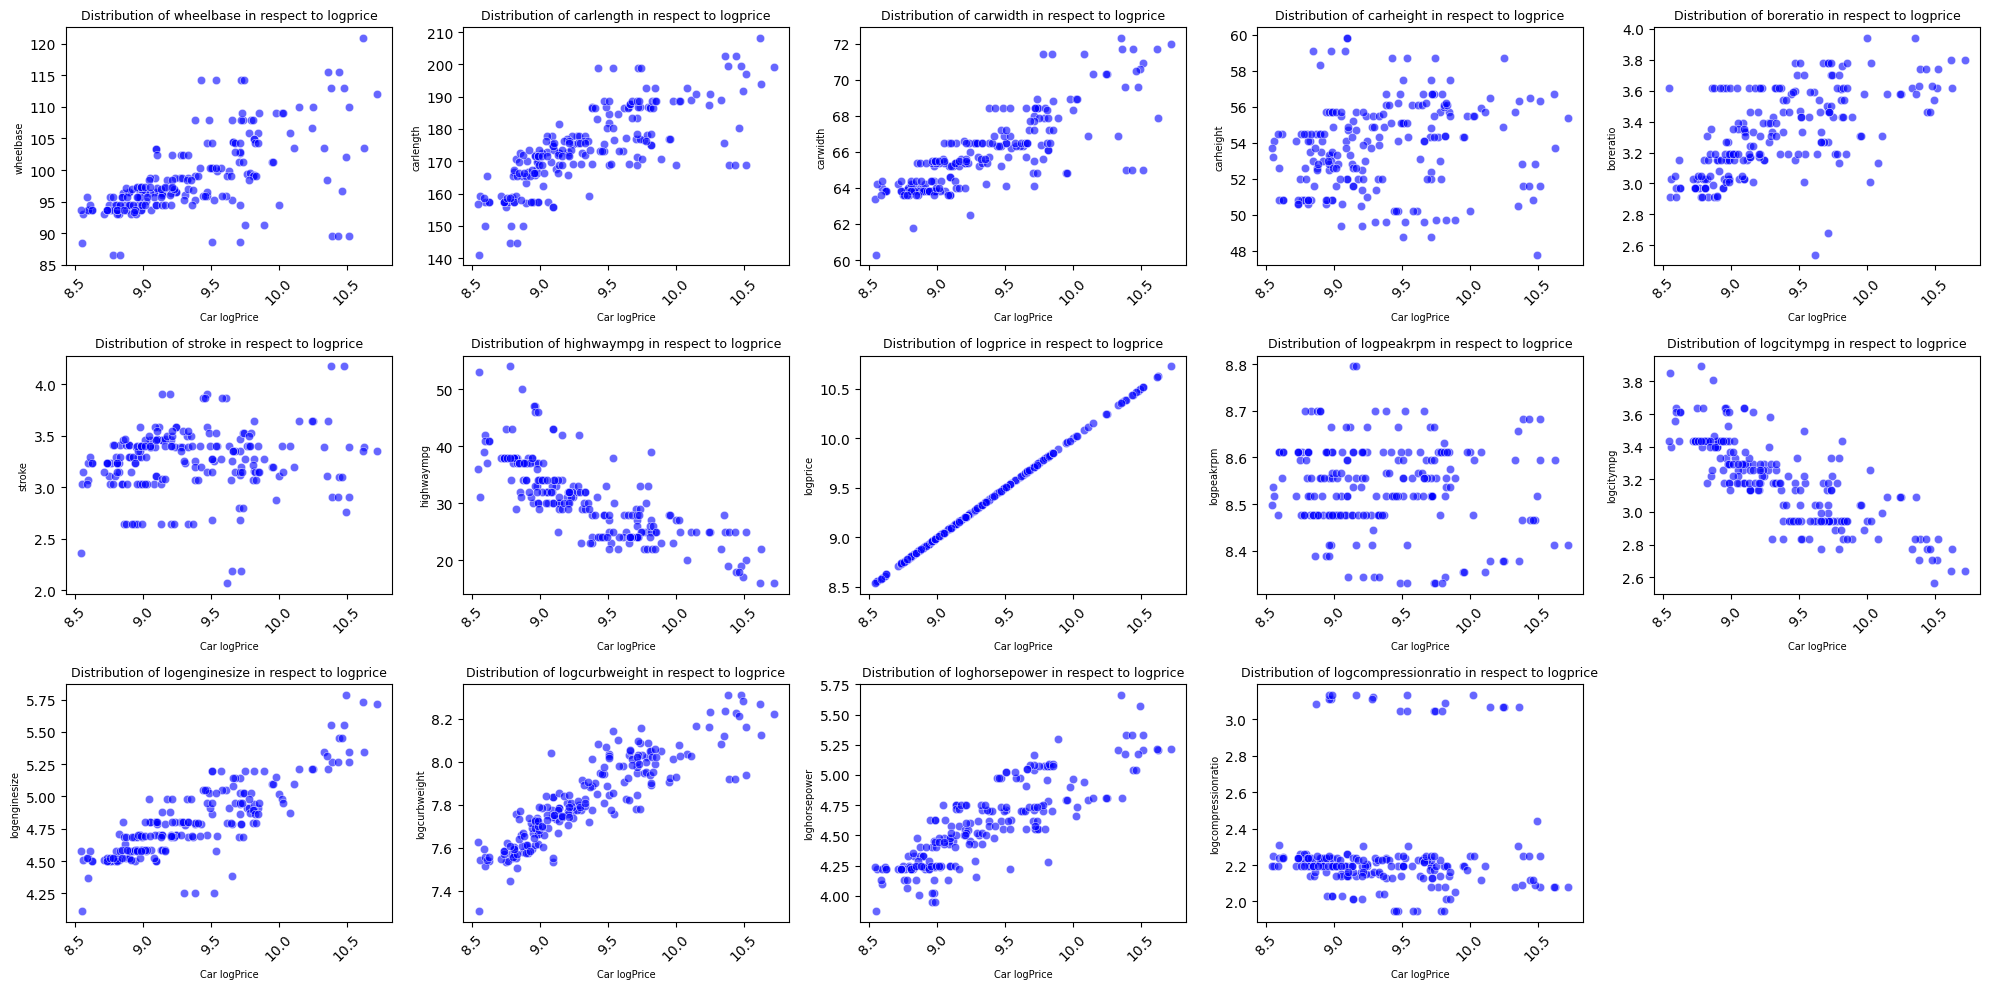

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()
columns_to_plot = carnum.columns

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(x=carnum["logprice"],y=carnum[column], color="blue", alpha=0.6, ax=ax)

    ax.set_title(f"Distribution of {column} in respect to logprice", fontsize=9)
    ax.set_xlabel("Car logPrice", fontsize=7)
    ax.set_ylabel(column, fontsize=7)
    ax.tick_params(axis="x", rotation=45)


for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('distribution_of_numeric_variables.png', dpi=300)
plt.show()

In [ ]:
corr = carnum.corr()
corr.style.background_gradient(cmap='coolwarm')

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,highwaympg,logprice,logpeakrpm,logcitympg,logenginesize,logcurbweight,loghorsepower,logcompressionratio
wheelbase,1.000000,0.874587,0.795144,0.589435,0.488750,0.160959,-0.544082,0.629401,-0.368427,-0.476808,0.593839,0.763385,0.412677,0.224971
carlength,0.874587,1.000000,0.841118,0.491029,0.606454,0.129533,-0.704662,0.767864,-0.288465,-0.672877,0.731821,0.889075,0.615988,0.132891
carwidth,0.795144,0.841118,1.000000,0.279210,0.559150,0.182942,-0.677218,0.802544,-0.223528,-0.670986,0.755994,0.858690,0.666306,0.153960
carheight,0.589435,0.491029,0.279210,1.000000,0.171071,-0.055307,-0.107358,0.162798,-0.324267,-0.023249,0.119669,0.301473,-0.071621,0.255928
boreratio,0.488750,0.606454,0.559150,0.171071,1.000000,-0.055909,-0.587012,0.610565,-0.258658,-0.578175,0.637616,0.670269,0.609800,-0.010601
stroke,0.160959,0.129533,0.182942,-0.055307,-0.055909,1.000000,-0.043931,0.097992,-0.075529,-0.042852,0.224142,0.159479,0.110743,0.150266
highwaympg,-0.544082,-0.704662,-0.677218,-0.107358,-0.587012,-0.043931,1.000000,-0.775197,-0.050940,0.960792,-0.702646,-0.818116,-0.848605,0.297894
logprice,0.629401,0.767864,0.802544,0.162798,0.610565,0.097992,-0.775197,1.000000,-0.097356,-0.812608,0.845738,0.890683,0.842740,0.060110
logpeakrpm,-0.368427,-0.288465,-0.223528,-0.324267,-0.258658,-0.075529,-0.050940,-0.097356,1.000000,-0.121075,-0.275747,-0.261355,0.128955,-0.435180
logcitympg,-0.476808,-0.672877,-0.670986,-0.023249,-0.578175,-0.042852,0.960792,-0.812608,-0.121075,1.000000,-0.719217,-0.804476,-0.898624,0.347250


Based on the correlation matrix ( in respect to logprice) and the previous plots, "carheight","stroke","logpeakrpm","logcompressionratio" shouldn't be informative of the target.

In [ ]:
carnum=carnum.drop(["carheight","stroke","logpeakrpm","logcompressionratio"],axis=1)
corr = carnum.corr()
masked_corr =corr.where((corr < -0.8) | (corr > 0.8))
masked_corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")

,wheelbase,carlength,carwidth,boreratio,highwaympg,logprice,logcitympg,logenginesize,logcurbweight,loghorsepower
wheelbase,1.00,0.87,nan,nan,nan,nan,nan,nan,nan,nan
carlength,0.87,1.00,0.84,nan,nan,nan,nan,nan,0.89,nan
carwidth,nan,0.84,1.00,nan,nan,0.80,nan,nan,0.86,nan
boreratio,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan
highwaympg,nan,nan,nan,nan,1.00,nan,0.96,nan,-0.82,-0.85
logprice,nan,nan,0.80,nan,nan,1.00,-0.81,0.85,0.89,0.84
logcitympg,nan,nan,nan,nan,0.96,-0.81,1.00,nan,-0.80,-0.90
logenginesize,nan,nan,nan,nan,nan,0.85,nan,1.00,0.86,0.81
logcurbweight,nan,0.89,0.86,nan,-0.82,0.89,-0.80,0.86,1.00,nan
loghorsepower,nan,nan,nan,nan,-0.85,0.84,-0.90,0.81,nan,1.00


When multicollinearity is present, the model may struggle to determine which variable is truly influencing the target, resulting in unreliable or unstable coefficient estimates. To identify variables with high correlation, we extract from the previous correlation matrix only the values less than -0.8 or greater than 0.8, focusing on the strongest relationships. Among the independent variables that exhibit strong correlations with each other, logcurbweight and loghorsepower are excluded. Both of these variables show a high correlation with logenginesize, which can effectively replace them, providing similar information without introducing redundancy.

In [ ]:
ccarnum=carnum.copy()
ccarnum=ccarnum.drop(["logcurbweight","loghorsepower"],axis=1)
corr = ccarnum.corr()
masked_corr =corr.where((corr < -0.8) | (corr > 0.8))
masked_corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")

,wheelbase,carlength,carwidth,boreratio,highwaympg,logprice,logcitympg,logenginesize
wheelbase,1.00,0.87,nan,nan,nan,nan,nan,nan
carlength,0.87,1.00,0.84,nan,nan,nan,nan,nan
carwidth,nan,0.84,1.00,nan,nan,0.80,nan,nan
boreratio,nan,nan,nan,1.00,nan,nan,nan,nan
highwaympg,nan,nan,nan,nan,1.00,nan,0.96,nan
logprice,nan,nan,0.80,nan,nan,1.00,-0.81,0.85
logcitympg,nan,nan,nan,nan,0.96,-0.81,1.00,nan
logenginesize,nan,nan,nan,nan,nan,0.85,nan,1.00


Final Dataset and Model Selection

In [ ]:
fincar=pd.concat([ccarnum,carcat],axis=1,ignore_index=False)
fincar.head()

,wheelbase,carlength,carwidth,boreratio,highwaympg,logprice,logcitympg,logenginesize,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,88.6,168.8,64.1,3.47,27,9.510075,3.044522,4.867534,3,gas,std,convertible,rwd,front,dohc,four,mpfi
1,88.6,168.8,64.1,3.47,27,9.711116,3.044522,4.867534,3,gas,std,convertible,rwd,front,dohc,four,mpfi
2,94.5,171.2,65.5,2.68,26,9.711116,2.944439,5.023881,1,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,99.8,176.6,66.2,3.19,30,9.543235,3.178054,4.691348,2,gas,std,sedan,fwd,front,ohc,four,mpfi
4,99.4,176.6,66.4,3.19,22,9.767095,2.890372,4.912655,2,gas,std,sedan,4wd,front,ohc,five,mpfi


Label Encoding and One-Hot Encoding depending on the variable characteristics. Label encodnig is only used with variabkes that have a scale of order inside them, in these case it's only in symboling.

In [ ]:
from sklearn.preprocessing import LabelEncoder
fincar_encoded = fincar.copy()
fincar_encoded = pd.get_dummies(fincar, columns=["fueltype","aspiration","enginelocation","carbody","drivewheel","enginetype","fuelsystem","cylindernumber"], drop_first=True)
label_encoder = LabelEncoder()
fincar_encoded["symboling"] = label_encoder.fit_transform(fincar_encoded["symboling"])


Training Set, Test Set and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X=fincar_encoded.drop("logprice",axis=1)
y=fincar_encoded["logprice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['wheelbase', 'carlength', 'carwidth', 'boreratio',
                    'highwaympg','logcitympg', 'logenginesize', 'symboling']
scaler = StandardScaler()

X_train_scaled_part = pd.DataFrame(
    scaler.fit_transform(X_train[columns_to_scale]),
    columns=columns_to_scale,
    index=X_train.index
)

X_train_non_scaled = X_train.drop(columns=columns_to_scale)
X_train_scaled = pd.concat([X_train_scaled_part, X_train_non_scaled], axis=1)

X_test_scaled_part = pd.DataFrame(
    scaler.transform(X_test[columns_to_scale]),
    columns=columns_to_scale,
    index=X_test.index
)

X_test_non_scaled = X_test.drop(columns=columns_to_scale)
X_test_scaled = pd.concat([X_test_scaled_part, X_test_non_scaled], axis=1)


Variables that are a result of the one-hot encoding, don't need to be scaled.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2= round(r2_score(y_test, y_pred),3)
mae= round(mean_absolute_error(y_test, y_pred),3)
rmse= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print("\nRegression Performance:")
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)
print("R-squared:", r2)


Regression Performance:
Mean Absolute Error: 0.137
Root Mean Square Error: 0.17
R-squared: 0.893


In [ ]:
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
r2= round(r2_score(y_test_exp, y_pred_exp),3)
mae= round(mean_absolute_error(y_test_exp, y_pred_exp),3)
rmse= round(np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)),3)
print("\nRegression Performance:")
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)
print("R-squared:", r2)


Regression Performance:
Mean Absolute Error: 2026.219
Root Mean Square Error: 3248.745
R-squared: 0.866


In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
ridge = Ridge()

param_grid = {'alpha': [0.01, 0.001, 0.0001, 0.0001]}
param_grid1 = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge = GridSearchCV(ridge, param_grid1, scoring='neg_mean_squared_error', cv=5)

grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_

grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_search_ridge.best_estimator_

print(f"Miglior alpha per Lasso: {grid_search_lasso.best_params_['alpha']}")
print(f"Miglior alpha per Ridge: {grid_search_ridge.best_params_['alpha']}")

y_pred_lasso = best_lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

y_pred_ridge = best_ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nLasso Regression Performance:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R-squared: {r2_lasso}")

print("\nRidge Regression Performance:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R-squared: {r2_ridge}")

Miglior alpha per Lasso: 0.0001
Miglior alpha per Ridge: 0.1

Lasso Regression Performance:
MAE: 0.1386215941147492
RMSE: 0.1716715516044555
R-squared: 0.8913809055861984

Ridge Regression Performance:
MAE: 0.13623177108638576
RMSE: 0.16896947829855327
R-squared: 0.8947732785786506


The parameter grid for Lasso was adjusted, as it initially mirrored that of Ridge, due to the model consistently selecting the minimum value within the parameter range as the optimal choice. To ensure it was the best parameter, it was verified whether it was the most effective option within the group or the overall best choice.

In [ ]:
y_pred_lasso_exp = np.exp(y_pred_lasso)
y_pred_ridge_exp = np.exp(y_pred_ridge)

mae_lasso = round(mean_absolute_error(y_test_exp, y_pred_lasso_exp),3)
rmse_lasso = round(np.sqrt(mean_squared_error(y_test_exp, y_pred_lasso_exp)),3)
r2_lasso = round(r2_score(y_test_exp, y_pred_lasso_exp),3)

mae_ridge = round(mean_absolute_error(y_test_exp, y_pred_ridge_exp),3)
rmse_ridge = round(np.sqrt(mean_squared_error(y_test_exp, y_pred_ridge_exp)),3)
r2_ridge = round(r2_score(y_test_exp, y_pred_ridge_exp),3)

print("\nLasso Regression Performance:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R-squared: {r2_lasso}")

print("\nRidge Regression Performance:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R-squared: {r2_ridge}")


Lasso Regression Performance:
MAE: 2005.803
RMSE: 3186.913
R-squared: 0.871

Ridge Regression Performance:
MAE: 1955.303
RMSE: 3081.787
R-squared: 0.88


In [ ]:
lasso_df = pd.DataFrame(best_lasso.coef_, columns=["Lasso Coefficients"])
ridge_df = pd.DataFrame(best_ridge.coef_, columns=["Ridge Coefficients"])
model_df = pd.DataFrame(model.coef_, columns=["Model Coefficients"])
inscoef = pd.concat([lasso_df, ridge_df, model_df], axis=1)
inscoef.index=X_test.columns
inscoef.columns = ["Lasso Coefficients", "Ridge Coefficients", "Model Coefficients"]
inscoef

,Lasso Coefficients,Ridge Coefficients,Model Coefficients
wheelbase,0.057250,0.051132,0.052976
carlength,0.052458,0.050968,0.057001
carwidth,0.083005,0.084396,0.080651
boreratio,0.003354,0.003161,0.015175
highwaympg,0.111978,0.116478,0.125034
logcitympg,-0.270269,-0.277044,-0.287164
logenginesize,0.045269,0.049617,0.025686
symboling,0.013001,0.012046,0.011672
fueltype_gas,-0.151105,-0.077330,-0.077585
aspiration_turbo,0.088760,0.088847,0.090604


In [ ]:
print("\nRegression Performance:")
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)
print("R-squared:", r2)

print("\nLasso Regression Performance:")
print(f"MAE: {mae_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R-squared: {r2_lasso}")

print("\nRidge Regression Performance:")
print(f"MAE: {mae_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R-squared: {r2_ridge}")


Regression Performance:
Mean Absolute Error: 2026.219
Root Mean Square Error: 3248.745
R-squared: 0.866

Lasso Regression Performance:
MAE: 2005.803
RMSE: 3186.913
R-squared: 0.871

Ridge Regression Performance:
MAE: 1955.303
RMSE: 3081.787
R-squared: 0.88


Check of the robustness of the best model.

Once the best model has been selected (in this case, Ridge Regression), it is important to assess whether the results were due to chance based on the specific train-test split. To address this, the model is iterated 10 times, with a different train-test data split each time while maintaining the same 80%-20% ratio. The results are then averaged to ensure the stability and reliability of the model's performance.

In [ ]:
X = fincar_encoded.drop("logprice", axis=1)
y = fincar_encoded["logprice"]

columns_to_scale = ['wheelbase', 'carlength', 'carwidth', 'boreratio',
                    'highwaympg', 'logcitympg', 'logenginesize', 'symboling']
scaler = StandardScaler()

mae_list = []
rmse_list = []
r2_list = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    X_train_scaled_part = pd.DataFrame(
        scaler.fit_transform(X_train[columns_to_scale]),
        columns=columns_to_scale,
        index=X_train.index
    )

    X_train_non_scaled = X_train.drop(columns=columns_to_scale)
    X_train_scaled = pd.concat([X_train_scaled_part, X_train_non_scaled], axis=1)

    X_test_scaled_part = pd.DataFrame(
        scaler.transform(X_test[columns_to_scale]),
        columns=columns_to_scale,
        index=X_test.index
    )

    X_test_non_scaled = X_test.drop(columns=columns_to_scale)
    X_test_scaled = pd.concat([X_test_scaled_part, X_test_non_scaled], axis=1)

    ridge = Ridge()
    param_grid1 = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid_search_ridge = GridSearchCV(ridge, param_grid1, scoring='neg_mean_squared_error', cv=5)
    grid_search_ridge.fit(X_train_scaled, y_train)
    best_ridge = grid_search_ridge.best_estimator_

    y_pred_ridge = best_ridge.predict(X_test_scaled)

    y_test_exp = np.exp(y_test)
    y_pred_ridge_exp = np.exp(y_pred_ridge)

    mae_ridge = round(mean_absolute_error(y_test_exp, y_pred_ridge_exp), 3)
    rmse_ridge = round(np.sqrt(mean_squared_error(y_test_exp, y_pred_ridge_exp)), 3)
    r2_ridge = round(r2_score(y_test_exp, y_pred_ridge_exp), 3)

    mae_list.append(mae_ridge)
    rmse_list.append(rmse_ridge)
    r2_list.append(r2_ridge)


mae_mean = round(np.mean(mae_list), 3)
mae_std = round(np.std(mae_list), 3)

rmse_mean = round(np.mean(rmse_list), 3)
rmse_std = round(np.std(rmse_list), 3)

r2_mean = round(np.mean(r2_list), 3)
r2_std = round(np.std(r2_list), 3)

print("\nRidge Regression Performance (after 10 iterations with different train-test splits):")
print(f"MAE: {mae_mean} ± {mae_std}")
print(f"RMSE: {rmse_mean} ± {rmse_std}")
print(f"R-squared: {r2_mean} ± {r2_std}")


Ridge Regression Performance (after 10 iterations with different train-test splits):
MAE: 1742.612 ± 184.418
RMSE: 2710.273 ± 409.707
R-squared: 0.896 ± 0.023
